# 2.3 Example - XANES LCF using Experiment Class

    In this example a first-middle-last scan LCF fit will be compelted and plotted against the known process parameters.

    This example assumes that you have a pickled experiment by previoudly running:
        '2.0 Example - Experiment Class -  XAS Data Processing'
        '2.1 Example - Experiment Class -  Normalized XANES-EXAFS-FT'
        '2.2 Example - Experiment Class -  XAS-Process Stream Correlation'


### Steps:
    
    1. Import Modules
    2. Define Paths
    3. Open Saved Experiment using 'pickle'
    4. Perform LCF
    5. Save Experiment with 'pickle'

### Things to have ready when attemtping this example:

    1. Directory and filename for the 'pickled' experiment 
    2. Scan name of one spectra in the experiment object

## Step 1. Import Modules

In [1]:
# File Handling
import os
import pickle

# Make Plotting interactive
from ipywidgets import interact, fixed

# Wrapper for xraylarch (larch)
os.chdir('..')
pwd = os.getcwd()
os.chdir('./catxas')
import general as fcts
import xas as xfcts
import plot as pfcts
import process
import experiment as exp

# Plot Handling
%matplotlib inline

## Step 2. Define Paths

    Note: The sample shown here has mass spec and LabView data.  As more process streams are generated, additional formats can be added. This is just an example.

#### Modify:
    1. pickle_dir - directory containing the pickled experiment
    2. pickpe_name - filename of the pickled experiment (must include extension '.pickle')
    3. scan_name - a name of one fo the spectra in the experiment, used for interrogation throughout

In [2]:
# Directory Containing Experiment:
pickle_dir = os.path.join(pwd, 'sample results')

# Name of Experiment (must include extension '.pickle')
pickle_name = 'SnO2_TPR.pickle'

# Scan Naame for looking at parts of the Experiment Object
scan_name = '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001'

## Step 3. Open Saved Experiment using 'pickle'

    Pickle - A method to save the experimental class and reopen it elsewhere.

In [3]:
pickle_path = os.path.join(pickle_dir,pickle_name)
pickle_in = open(pickle_path,"rb")
my_exp = pickle.load(pickle_in)
pickle_in.close()

## Step 4. Perform LCF

    Notes:
        a. Basis sets must be larch groups that have been calibrated and normalized
        

### Major steps for performing LCF:
    
    a. Generate list of basis spectra groups
    b. Load basis set into a "Fit"
    c. Perform LCF
    d. Generate a Fit Report
    e. Visualize Fit and Errors with one Process Parameter
    f. Visulaize Single Fit
    


### 4a. Generate list of basis spectra groups

    In this section we ae using three basis spectra that are taken from the main data set, not standards.
        1. First Scan (*_0001)
        2. ~Middle Scan (*_0003)
        3. Last Scan (*_0050)
        
    Notes:
        1. Each basis gropu must have its own name.
        2. Basis are compiled into a list prior to uploading into the experiment

In [16]:
# Basis set made from three spectra in the sample dataset
basis1 = my_exp.spectra['20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001']['Absorption Spectra']['mu Sample'] 
basis1.name = '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001'

basis2 = my_exp.spectra['20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0031']['Absorption Spectra']['mu Sample']
basis2.name = '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0031'

basis3 = my_exp.spectra['20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0050']['Absorption Spectra']['mu Sample']
basis3.name = '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0050'

basis = [basis1, basis2, basis3]

### 4b. Load basis set into a "Fit"

    Each LCF fit can be saved under a different "Fit name". Choosing the same name will overwrite a former Fit

#### MODIFY:
    1. fit_name - unique name for the fit

In [17]:
# Load list of basis spectra into the experiment
fit_name = 'Fit 2'


my_exp.load_lcf_basis(basis, 'Fit 2')

#### Inspection tool to show how LCF is added to the experiment
    1. Dictionary of fits - experiment.analysis['LCF]
    2. Visualization of the uploaded basis sets

In [19]:
# 1. Inspect Analysis side of experiment

fit = 'Fit 2'


print('keys in the experiment.analysis object:')
for key in my_exp.analysis.keys():
    print(f'\t{key}')
    
print('\nkeys in the "LCF" dictionary')
for key in my_exp.analysis['LCF'].keys():
    print(f'\t{key}')

print(f'\nkeys of "{fit}"')
for key in my_exp.analysis['LCF'][fit].keys():
    print(f'\t{key}')  

keys in the experiment.analysis object:
	LCF
	PCA

keys in the "LCF" dictionary
	Fit 1
	Fit 2

keys of "Fit 2"
	basis spectra


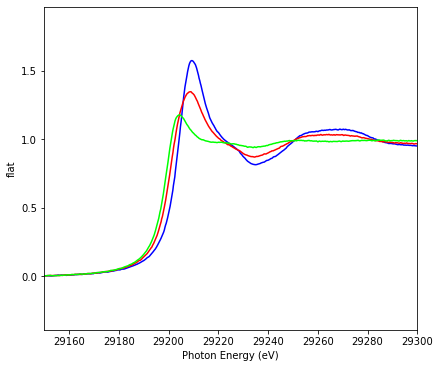

In [20]:
# 2. Visualize basis sets for fitting

# MODIFY: fit_name, emin, emax

fit_name = 'Fit 2'
emin = 29150
emax = 29300


basis_groups = my_exp.analysis['LCF'][fit_name]['basis spectra']

pfcts.plot_XANES(basis_groups, emin, emax, spectra = 'flat', 
                 deriv = False, e0 = None, e0_line = False, 
                 overlay = True, use_legend = False)

### 4c. Perform LCF

    This fitting step allows different paramters to updated and the fit to be performed.  This step can be run multiple times as needed.

#### MODIFY:
    1. fit_name - which fit is being completed 
    2. emin - starting energy range for the LCF
    3. emax - ending enregy range for the LCF
    4. minvals - minimum values that fits can be at (lower limit of component fraction)
    5. maxvals - maximum values that fits can be at (upper limit of component fraction)
    6. array_name - what spectra to fit, 'mu', 'norm', 'flat' are common options
    7. sum_to_one - True = all components fractions must sum to 1, False = component fractions can some to anything
    

In [21]:
# Fit the sample spectra
fit_name = 'Fit 2'
emin = 29150
emax = 29250
minvals = 0
maxvals = 1
array_name = 'flat'
sum_to_one = True

my_exp.fit_LCF(fit_name, emin, emax, 
               weights = None, minvals = minvals, maxvals = maxvals, 
               arrayname = array_name, sum_to_one = sum_to_one)

#### Inspection tool to show how LCF is updated
    1. Dictionary of fit - experiment.analysis['LCF'][fit_name]
    2. LCF result for a single spectra

In [22]:
# 1. inspection of the updated fit 

fit = 'Fit 2'

print(f'keys of "{fit}"')
for key in my_exp.analysis['LCF'][fit].keys():
    print(f'\t{key}') 

keys of "Fit 2"
	basis spectra
	Results


In [23]:
# 2. LCF results for the first scan 
my_exp.analysis['LCF']['Fit 2']['Results'][scan_name]

Attribute,Type
result,MinimizerResult
chisqr,float64
redchi,float64
params,OrderedDict
weights,OrderedDict
weights_lstsq,OrderedDict
xdata,ndarray
ydata,ndarray
yfit,ndarray
ycomps,OrderedDict


### 4d. Generate a Fit Report

    This step compiles all the LCF results for each spectr into a easy to read dataframe into "Fit Summary"
    
#### Modify:
    
    1. fit_name - name of fit to generate report on

In [24]:
# Generate fit report for all spectra
fit_name = 'Fit 2'

my_exp.lcf_report('Fit 2')

#### Inspection tool to show how LCF is updated
    1. Dictionary of fit - experiment.analysis['LCF'][fit_name]
    2. Fit Summary results

In [25]:
# 1. inspection of the updated fit contents

fit = 'Fit 2'

print(f'keys of "{fit}"')
for key in my_exp.analysis['LCF'][fit].keys():
    print(f'\t{key}')

keys of "Fit 2"
	basis spectra
	Results
	Fit Summary


In [26]:
# 2. Contents of the Fit Summary
my_exp.analysis['LCF']['Fit 2']['Fit Summary']

,Name,Chi2,RedChi2,Variables,Amp1,Amp1-stdev,Amp2,Amp2-stdev,Amp3,Amp3-stdev,Sum Amp
0,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001,2.260458e-29,5.825924e-32,2,1.000000e+00,1.815481e-16,0.000000,1.776757e-24,1.332268e-15,1.815481e-16,1.000000
1,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0002,4.025588e-03,1.040204e-05,2,1.000000e+00,3.322810e-12,0.000000,1.852209e-12,0.000000e+00,4.757276e-12,1.000000
2,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0003,2.702799e-03,6.983976e-06,2,9.965365e-01,3.674953e-03,0.002956,7.151173e-03,5.072990e-04,3.641442e-03,1.000000
3,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0004,3.257557e-03,8.395765e-06,2,9.971980e-01,1.661018e-03,0.003003,1.676350e-03,0.000000e+00,1.930056e-04,1.000201
4,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0005,3.714439e-03,9.573297e-06,2,9.843819e-01,1.777518e-03,0.016672,1.793616e-03,0.000000e+00,2.060489e-04,1.001054
5,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0006,3.847391e-03,9.915957e-06,2,9.879297e-01,1.811121e-03,0.012651,1.827793e-03,0.000000e+00,2.096521e-04,1.000580
6,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0007,3.467810e-03,8.960751e-06,2,9.858769e-01,1.723485e-03,0.015364,1.739872e-03,0.000000e+00,1.997834e-04,1.001241
7,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0008,2.745503e-03,7.094324e-06,2,9.927506e-01,1.531156e-03,0.007470,1.545509e-03,0.000000e+00,1.775266e-04,1.000221
8,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0009,3.853512e-03,9.957395e-06,2,9.825814e-01,4.390301e-03,0.017419,8.566317e-03,1.045015e-08,4.373322e-03,1.000000
9,20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0010,4.452555e-03,1.150531e-05,2,9.997927e-01,4.744319e-03,0.000017,9.252923e-03,1.904134e-04,4.719943e-03,1.000000


### 4e. Visualize Fit and Errors with one Process Parameter

#### Modify:
    1. fit_name
    2. process_param - name of parameter from a process stream. Common option is temperature (from LV:'TR1 T [°C]')

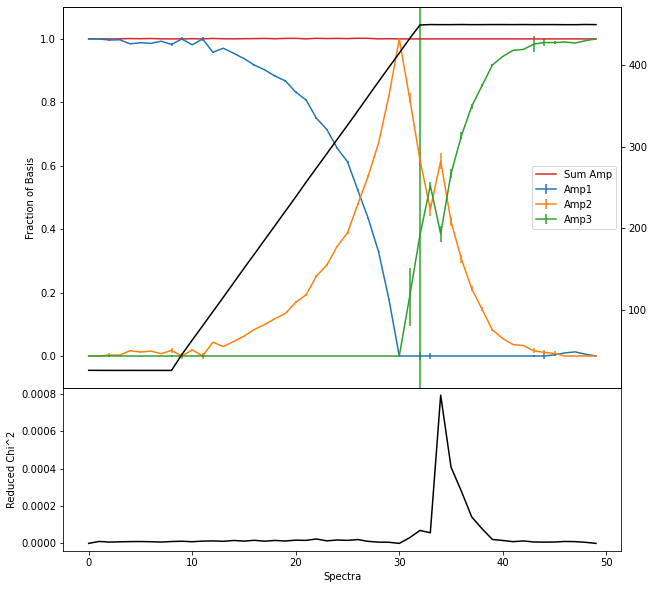

In [27]:
# Visualize Fit with process parameter

fit_name = 'Fit 2'
process_param = 'TR1 T [°C]'

my_exp.plot_LCF_results(fit_name, process_parameter = process_param)

### 4f. Visulaize Single Fit

#### Modify:
    1. fit_name
    2. emin/emax - Energy range to plot over 
    3. ymin/ymax - Adjsutd scaling as needed

In [28]:
# Visualize individual fits

fit_name = 'Fit 2'
emin = 29150
emax = 29250
ymin = -0.05
ymax = 1.6


interact(my_exp.plot_LCF, spectra = my_exp.spectra.keys(),
        fit_name = fixed(fit_name),
        emin = fixed(emin), emax = fixed(emax), 
        ymin = fixed(ymin), ymax = fixed(ymax))



interactive(children=(Dropdown(description='spectra', options=('20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001', '2…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

## Step 5. Save Experiment with 'pickle' 
    Pickle - A method to save the experimental class and reopen it elsewhere.

In [29]:
pickle_out = open(pickle_path,"wb")
pickle.dump(my_exp, pickle_out)
pickle_out.close()